In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/usr0/home/naveenr/projects/patient_provider')

In [3]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import GRB
import random
from itertools import permutations


In [64]:
from patient.simulator import Simulator
from patient.semi_synthetic import *


In [6]:
import pandas as pd

In [7]:
medicare_data = pd.read_csv("../../data/medicare_data.csv")
zipcode_data = pd.read_csv("../../data/connecticut_zipcode.csv")
age_distro = pd.read_csv("../../data/ct_age.csv")

/usr0/home/naveenr/miniconda3/envs/patient/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (15,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
medicare_data['sec_spec_all'][1] == 'INTERNAL MEDICINE'

True

In [17]:
ct_data = medicare_data[medicare_data['State'] == 'CT']
ct_data = ct_data[ct_data['sec_spec_all'].str.contains('INTERNAL MEDICINE|GENERAL PRACTICE|FAMILY', case=False, na=False)]
for key, specialties in specialty_grouping.items():
    ct_data[key] = ct_data['sec_spec_all'].apply(lambda x: any(spec in x for spec in specialties))


In [22]:
len(ct_data[ct_data['cardio'] | ct_data['gastro'] | ct_data['neuro'] | ct_data['substance'] | ct_data['onco']])

146

In [49]:
cardio = """113 (1.6)	346 (4.7)	524 (7.8)	673 (10.6)
148 (2.1)	560 (7.6)	924 (13.8)	1129 (17.8)
54 (0.8)	150 (2.0)	200 (3.0)	487 (7.7)
1349 (18.9)	2588 (35.2)	2959 (44.3)	2946 (46.4)
69 (1.0)	204 (2.8)	363 (5.4)	760 (12.0)
43 (0.6)	75 (1.0)	65 (1.0)	82 (1.3)
19 (0.3)	93 (1.3)	164 (2.5)	212 (3.3)""".split("\n")

In [53]:
gastro = """157 (2.2)	122 (1.7)	85 (1.3)	65 (1.0)
171 (2.4)	256 (3.5)	299 (4.5)	348 (5.5)
13 (0.2)	13 (0.2)	13 (0.2)	10 (0.2)
60 (0.8)	77 (1.0)	115 (1.7)	169 (2.7)
403 (5.7)	824 (11.2)	1033 (15.5)	958 (15.1)""".split("\n")

In [54]:
neuro = """54 (0.8)	162 (2.2)	277 (4.1)	502 (7.9)
3 (0.0)	3 (0.0)	29 (0.4)	268 (4.2)
8 (0.1)	10 (0.1)	3 (0.0)	3 (0.0)
47 (0.7)	45 (0.6)	60 (0.9)	81 (1.3)""".split("\n")

In [57]:
substance = """188 (2.6)	197 (2.7)	122 (1.8)	65 (1.0)
123 (1.7)	31 (0.4)	16 (0.2)	2 (0.0)""".split("\n")

In [56]:
onco = """438 (6.1)	659 (9.0)	939 (14.1)	1284 (20.2)
3 (0.0)	14 (0.2)	27 (0.4)	16 (0.3)
11 (0.2)	17 (0.2)	21 (0.3)	27 (0.4)""".split("\n")

In [63]:
parse_data(cardio), parse_data(gastro), parse_data(substance), parse_data(neuro)

(array([0.23962636, 0.46888989, 0.6079007 , 0.69464705]),
 array([0.10886689, 0.16773902, 0.2186218 , 0.22870934]),
 array([0.042558, 0.030892, 0.019964, 0.01    ]),
 array([0.01592906, 0.02884013, 0.05343248, 0.12915213]))

In [68]:
generate_semi_synthetic_theta_workload(25,25,comorbidities=True)

/usr0/home/naveenr/miniconda3/envs/patient/lib/python3.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (15,26) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


[0 0 0 0 0] [0 0 0 0 0]
[0 0 0 0 0] [0 0 0 0 0]
[1 0 0 0 0] [0 0 0 0 0]
[1 0 0 0 0] [0 0 0 0 0]
[1 0 0 0 0] [0 1 0 0 0]
[1 0 0 0 0] [1 0 0 0 0]
[1 0 0 0 0] [0 0 0 0 0]
[1 0 0 0 0] [0 0 0 0 0]
[1 0 0 0 0] [0 0 0 0 0]
[1 0 0 0 0] [0 1 0 0 0]
[0 0 0 0 0] [0 0 0 0 0]
[0 0 0 0 0] [0 0 0 0 0]
[0 0 0 0 0] [0 0 0 0 0]
[0 0 0 0 0] [0 0 0 0 0]
[0 0 0 0 0] [0 0 0 0 0]
[0 0 0 0 0] [0 0 0 0 0]
[0 0 0 0 0] [0 0 0 0 0]
[0 0 0 0 0] [0 0 0 0 0]
[0 0 0 0 0] [0 0 0 0 0]
[0 0 0 0 0] [1 0 0 0 0]
[0 0 0 0 0] [0 0 0 0 0]
[0 0 0 0 0] [0 0 0 0 0]
[0 0 0 0 0] [0 0 0 0 0]
[0 0 0 0 0] [0 0 0 0 0]
[0 0 0 0 0] [0 1 0 0 0]
[0 0 0 0 0] [1 0 0 0 0]
[0 0 0 0 0] [0 0 0 0 0]
[0 0 0 0 0] [0 0 0 0 0]
[0 0 0 0 0] [0 0 0 0 0]
[0 0 0 0 0] [0 1 0 0 0]
[0 0 0 0 0] [0 0 0 0 0]
[0 0 0 0 0] [0 0 0 0 0]
[0 0 0 0 0] [0 0 0 0 0]
[0 0 0 0 0] [0 0 0 0 0]
[0 0 0 0 0] [0 1 0 0 0]
[0 0 0 0 0] [1 0 0 0 0]
[0 0 0 0 0] [0 0 0 0 0]
[0 0 0 0 0] [0 0 0 0 0]
[0 0 0 0 0] [0 0 0 0 0]
[0 0 0 0 0] [0 1 0 0 0]
[1 1 0 0 0] [0 0 0 0 0]
[1 1 0 0 0] [0 0

(array([[0.        , 0.        , 0.        , 0.67501568, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.67501568, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.75      , 0.6782866 , 0.        , 0.        , 0.75      ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 1.        , 0.        , 0.75      ,
         0.75      , 0.        , 0.        , 0.        , 0.75      ,
         0.75      , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.60137433, 0.75      , 0.        , 0.        ,
         0.58981705, 0.63136831, 0.75      , 0.        , 0.        ,
         0.75      , 0.63786895, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ,

In [23]:
len(ct_data)

1098

In [16]:
ct_data.columns

Index(['NPI', 'Ind_PAC_ID', 'Ind_enrl_ID', 'Provider Last Name',
       'Provider First Name', 'Provider Middle Name', 'suff', 'gndr', 'Cred',
       'Med_sch', 'Grd_yr', 'pri_spec', 'sec_spec_1', 'sec_spec_2',
       'sec_spec_3', 'sec_spec_4', 'sec_spec_all', 'Telehlth', 'Facility Name',
       'org_pac_id', 'num_org_mem', 'adr_ln_1', 'adr_ln_2', 'ln_2_sprs',
       'City/Town', 'State', 'ZIP Code', 'Telephone Number', 'ind_assgn',
       'grp_assgn', 'adrs_id'],
      dtype='object')

In [10]:
filtered_data  = ct_data[(ct_data['sec_spec_all'] != 'INTERNAL MEDICINE') & (ct_data['sec_spec_all'] != 'FAMILY PRACTICE') & (ct_data['sec_spec_all'] != 'GENERAL PRACTICE')]

In [11]:
from collections import Counter

In [12]:
Counter(list(filtered_data['sec_spec_1']) + list(filtered_data['sec_spec_2']) + list(filtered_data['sec_spec_3']) + list(filtered_data['sec_spec_4']))

Counter({'INTERNAL MEDICINE': 152,
         'CRITICAL CARE (INTENSIVISTS)': 60,
         'ENDOCRINOLOGY': 5,
         'HEMATOLOGY': 10,
         'CARDIOVASCULAR DISEASE (CARDIOLOGY)': 29,
         'FAMILY PRACTICE': 4,
         'ADDICTION MEDICINE': 6,
         'HOSPITALIST': 6,
         'CARDIAC ELECTROPHYSIOLOGY': 1,
         'ALLERGY/IMMUNOLOGY': 2,
         'GERIATRIC MEDICINE': 1,
         'GENERAL PRACTICE': 9,
         'ADVANCED HEART FAILURE AND TRANSPLANT CARDIOLOGY': 6,
         'PEDIATRIC MEDICINE': 5,
         'HOSPICE/PALLIATIVE CARE': 5,
         'PERIPHERAL VASCULAR DISEASE': 12,
         'INTERVENTIONAL CARDIOLOGY': 10,
         'MEDICAL ONCOLOGY': 8,
         'PULMONARY DISEASE': 1,
         'RHEUMATOLOGY': 1,
         'NEPHROLOGY': 4,
         'SLEEP MEDICINE': 10,
         nan: 302,
         'NEUROLOGY': 4,
         nan: 1,
         nan: 1,
         nan: 1})

In [46]:
inp = """Myocardial Infarct	113 (1.6)	346 (4.7)	524 (7.8)	673 (10.6)
Angina/ Artery Disease	148 (2.1)	560 (7.6)	924 (13.8)	1129 (17.8)
Congestive Heart Failure	54 (0.8)	150 (2.0)	200 (3.0)	487 (7.7)
Hypertension	1349 (18.9)	2588 (35.2)	2959 (44.3)	2946 (46.4)
Arrhythmias	69 (1.0)	204 (2.8)	363 (5.4)	760 (12.0)
Venous Disease	43 (0.6)	75 (1.0)	65 (1.0)	82 (1.3)
Peripheral Arterial Disease	19 (0.3)	93 (1.3)	164 (2.5)	212 (3.3)
Respiratory Disease	429 (6.0)	758 (10.3)	996 (14.9)	1075 (16.9)
Hepatic Disease	157 (2.2)	122 (1.7)	85 (1.3)	65 (1.0)
Gastro-Intestinal Disease	171 (2.4)	256 (3.5)	299 (4.5)	348 (5.5)
Pancreatic Disease	13 (0.2)	13 (0.2)	13 (0.2)	10 (0.2)
Renal Disease	60 (0.8)	77 (1.0)	115 (1.7)	169 (2.7)
Diabetes Mellitus	403 (5.7)	824 (11.2)	1033 (15.5)	958 (15.1)
Stroke	54 (0.8)	162 (2.2)	277 (4.1)	502 (7.9)
Dementia	3 (0.0)	3 (0.0)	29 (0.4)	268 (4.2)
Paralysis	8 (0.1)	10 (0.1)	3 (0.0)	3 (0.0)
Neuromuscular Disease	47 (0.7)	45 (0.6)	60 (0.9)	81 (1.3)
Psychiatric Disorder	365 (5.1)	324 (4.4)	207 (3.1)	256 (4.0)
Rheumatologic Disease	74 (1.0)	127 (1.7)	145 (2.2)	147 (2.3)
HIV/AIDS	140 (2.0)	29 (0.4)	11 (0.2)	1 (0.0)
Previous Solid Tumor(s)	438 (6.1)	659 (9.0)	939 (14.1)	1284 (20.2)
Leukemia and Myeloma	3 (0.0)	14 (0.2)	27 (0.4)	16 (0.3)
Lymphoma	11 (0.2)	17 (0.2)	21 (0.3)	27 (0.4)
Alcohol Abuse	188 (2.6)	197 (2.7)	122 (1.8)	65 (1.0)
Illicit Drug Abuse	123 (1.7)	31 (0.4)	16 (0.2)	2 (0.0)
Obesity (BMI >38)""".split("\n")
print("\n".join([j.split("\t")[0] for j in inp]))

Myocardial Infarct
Angina/ Artery Disease
Congestive Heart Failure
Hypertension
Arrhythmias
Venous Disease
Peripheral Arterial Disease
Respiratory Disease
Hepatic Disease
Gastro-Intestinal Disease
Pancreatic Disease
Renal Disease
Diabetes Mellitus
Stroke
Dementia
Paralysis
Neuromuscular Disease
Psychiatric Disorder
Rheumatologic Disease
HIV/AIDS
Previous Solid Tumor(s)
Leukemia and Myeloma
Lymphoma
Alcohol Abuse
Illicit Drug Abuse
Obesity (BMI >38)


## Edit Distances

In [ ]:
def closest_string(X, Y):
    n, m = len(X), len(Y)
    dp = [[0] * (m + 1) for _ in range(n + 1)]
    
    # Initialize the first row and column
    for i in range(n + 1):
        dp[i][0] = i
    for j in range(m + 1):
        dp[0][j] = j
    
    # Build the dynamic programming table
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if X[i - 1] == Y[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = 1 + min(dp[i - 1][j], dp[i][j - 1], dp[i - 1][j - 1])
    
    return dp[-1][-1]

In [ ]:
def distance(X,Y,K):
    return max(closest_string(X,Y)-K,0)

In [ ]:
def generate_random_string(N):
    return ''.join(random.choice('AB') for _ in range(N))

In [23]:
reference_strings = [generate_random_string(5) for i in range(10)]

In [72]:
Y = generate_random_string(8)
K = 3

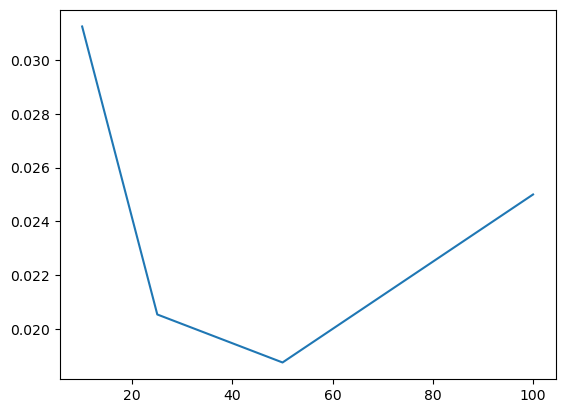

In [74]:
distance_matrix = []
perms = permutations(Y)
for perm in perms:
    Y_ = ''.join(perm)
    distance_matrix.append([distance(X,Y_,K) for X in reference_strings])
distance_matrix = np.array(distance_matrix)
avg_rates = np.mean(distance_matrix,axis=0)

num_samples = 100
num_trials = 20

regret_by_samples = {}

for num_samples in [10,25,50,100]:
    regret_by_samples[num_samples] = []

    for i in range(num_trials):
        distance_matrix = []
        perms = permutations(Y)
        perms_list = list(perms)
        perms = random.sample(perms_list, num_samples)
        for perm in perms:
            Y_ = ''.join(perm)
            distance_matrix.append([distance(X,Y_,K) for X in reference_strings])
        distance_matrix = np.array(distance_matrix)
        predicted_idx = np.argmin(np.mean(distance_matrix,axis=0))
        regret_by_samples[num_samples].append(avg_rates[predicted_idx]-np.min(avg_rates))

x_axis = [10,25,50,100]
plt.plot(x_axis,[np.mean(regret_by_samples[i]) for i in x_axis])


In [75]:
def top(epsilon):
    a = .5*(1+epsilon)*(epsilon/(1.2+epsilon)*.5 + 1/(2+epsilon)*epsilon/(1+epsilon))
    a += .5*(.2+epsilon)*(.2/(1.2+epsilon)*epsilon/(1+epsilon) + epsilon/(2+epsilon)*.2/1.2)
    return a/(epsilon/(1+epsilon)*epsilon + 1/2*1)

In [81]:
top(0.000001)

9.666666666645416e-07

## Doing some Math

In [5]:
square = [0.4 for i in range(4)]+[1 for i in range(5)]
triangle = [0.8 for i in range(9)]

In [12]:
[np.mean(square+[0.9]),np.mean(triangle+[0.6])]

[0.75, 0.78]

## Assortment Linear Program

In [83]:
utilities = [random.random() for i in range(10)]
exit_option = random.random() 

In [84]:
best_assortment = []
best_score = 0
for assortment_combo in range(2**len(utilities)):
    assortment = [int(j) for j in bin(assortment_combo)[2:].zfill(len(utilities))]
    score = 0

    denom = np.sum([utilities[i]*assortment[i] for i in range(len(utilities))])+ exit_option
    for i in range(len(utilities)):
        prob = utilities[i]*assortment[i]/denom 
        score += prob*utilities[i] 
    if score > best_score:
        best_score = score 
        best_assortment = assortment
best_assortment, best_score

([0, 1, 1, 0, 1, 1, 1, 0, 0, 0], 0.6023784449512034)

In [85]:
N = len(utilities)
z_star = best_score 
u_coeffs = utilities 
model = gp.Model("ILP")
y = model.addVars(N, vtype=GRB.BINARY, name="y")
objective_expr = gp.LinExpr()
for j in range(N):
    objective_expr += (u_coeffs[j] - z_star) * u_coeffs[j] * y[j]/exit_option
model.setObjective(objective_expr, GRB.MAXIMIZE)
model.setParam('OutputFlag', 0)
for j in range(N):
    model.addConstr(y[j] >= 0)
    model.addConstr(y[j] <= 1)
model.optimize()
y = [int(y[j].x) for j in range(N)]
y

[0, 1, 1, 0, 1, 1, 1, 0, 0, 0]

In [86]:
model = gp.Model("LP")
model.setParam('OutputFlag', 0)
w = model.addVars(N+1, name="w")
objective_expr = gp.LinExpr()
for j in range(1, N+1):
    objective_expr += u_coeffs[j-1] * w[j]
model.setObjective(objective_expr, GRB.MAXIMIZE)

sum_expr = gp.LinExpr()
for j in range(1, N+1):
    sum_expr += w[j]
model.addConstr(sum_expr + w[0] == 1)

for j in range(1, N+1):
    if u_coeffs[j-1]>0:
        model.addConstr(w[j] / u_coeffs[j-1] <= w[0]/exit_option)
    else:
        model.addConstr(w[j]  <= 0)
model.optimize()

w_vals = [round((w[j].x*exit_option)/(u_coeffs[j-1]*w[0].x)) for j in range(1,N+1)]
w_vals

[0, 1, 1, 0, 1, 1, 1, 0, 0, 0]

## Patient-Provider Matches

In [5]:
num_patients = 20
num_providers = 10

In [6]:
s = Simulator(num_patients,num_providers)

In [7]:
seed_list = list(range(42,52))

In [8]:
results = s.simulate_no_renetry(random_policy,seed_list=seed_list)
np.mean(results), np.std(results)

(13.2, 1.4696938456699067)

In [9]:
results = s.simulate_no_renetry(greedy_policy,seed_list=seed_list)
np.mean(results), np.std(results)

(15.7, 1.004987562112089)

In [160]:
results = s.simulate_no_renetry(brute_force_discount,seed_list=seed_list)
np.mean(results), np.std(results)

(16.3, 0.9)

In [161]:
s = Simulator(num_patients,num_providers)
results = s.simulate_with_renetry(random_policy,seed_list=seed_list)
np.mean(results['matches']), np.std(results['matches']), np.mean(results['waittimes']), np.std(results['waittimes'])

(16.4, 0.9165151389911679, 0.17, 0.44844174649557333)

In [162]:
s = Simulator(num_patients,num_providers)
results = s.simulate_with_renetry(greedy_policy,seed_list=seed_list)
np.mean(results['matches']), np.std(results['matches']), np.mean(results['waittimes']), np.std(results['waittimes'])

(16.7, 1.5524174696260022, 0.1, 0.33166247903553997)

In [163]:
results = s.simulate_with_renetry(brute_force_discount,seed_list=seed_list)
np.mean(results['matches']), np.std(results['matches']), np.mean(results['waittimes']), np.std(results['waittimes'])

(17.0, 1.5491933384829668, 0.105, 0.33760183648789593)

In [164]:
results = s.simulate_with_renetry(brute_force_discount_lamb,seed_list=seed_list)
np.mean(results['matches']), np.std(results['matches']), np.mean(results['waittimes']), np.std(results['waittimes'])

(17.3, 1.5524174696260025, 0.09, 0.31921779399024736)